In [1]:
import pandas as pd

In [2]:
crime_large = pd.read_csv('../data/NYPD_Complaint_Data_Historic_2013to2017.csv')
crime_large.head(2)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,677443610,01/01/2013,00:01:00,12/31/2014,23:59:00,34.0,12/27/2018,116,SEX CRIMES,168.0,...,M,NaN,40.851488,-73.935458,"(40.851487774, -73.935457967)",PATROL BORO MAN NORTH,NaN,18-24,BLACK HISPANIC,F
1,561958884,01/01/2013,16:00:00,02/29/2016,19:00:00,108.0,01/05/2018,104,RAPE,157.0,...,M,NaN,40.743080,-73.954736,"(40.743080168, -73.954736461)",PATROL BORO QUEENS NORTH,NaN,<18,WHITE HISPANIC,F


In [3]:
# columns with null data
crime_large.columns[crime_large.isnull().any()]

Index(['CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'ADDR_PCT_CD',
       'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURISDICTION_CODE', 'PARKS_NM',
       'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [4]:
# reduce dataset size by removing unnecessary columns
print(f"before: {crime_large.shape}")
crime = crime_large[['CMPLNT_NUM', 
                     'CMPLNT_FR_DT', #'CMPLNT_FR_TM',
                     'CMPLNT_TO_DT', #'CMPLNT_TO_TM', 
                     'RPT_DT',            # report date
                     'ADDR_PCT_CD',       # precinct
                     'BORO_NM',           # borough
                     'OFNS_DESC',         # offence description
                     'CRM_ATPT_CPTD_CD',  # whether crime succeeded/intercepted
                     'LAW_CAT_CD',        # Level of offense: felony, misdemeanor, violation
                     'PREM_TYP_DESC',     # Specific description of premises e.g. garden / grocer
                     'Latitude', 'Longitude']]
print(f"after: {crime.shape}")

before: (2410253, 35)
after: (2410253, 12)


In [5]:
# cast data type to datetime
date_cols = ['CMPLNT_FR_DT', 'CMPLNT_TO_DT', 'RPT_DT']
for col in date_cols:
    crime[col] = pd.to_datetime(crime[col], errors='coerce')

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
# check whether datecols are valid
crime[date_cols].isnull().any()

CMPLNT_FR_DT    False
CMPLNT_TO_DT     True
RPT_DT          False
dtype: bool

In [7]:
# remove those with null CMPLNT_TO_DT
print(f"before: {crime.shape}")
crime.dropna(subset=['CMPLNT_TO_DT'], inplace=True)
print(f"after: {crime.shape}")

before: (2410253, 12)
after: (1956549, 12)


/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
crime['CRIME_DURATION'] = crime.CMPLNT_TO_DT - crime.CMPLNT_FR_DT
crime.head(2)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_TO_DT,RPT_DT,ADDR_PCT_CD,BORO_NM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,PREM_TYP_DESC,Latitude,Longitude,CRIME_DURATION
0,677443610,2013-01-01,2014-12-31,2018-12-27,34.0,MANHATTAN,SEX CRIMES,COMPLETED,FELONY,RESIDENCE - APT. HOUSE,40.851488,-73.935458,729 days
1,561958884,2013-01-01,2016-02-29,2018-01-05,108.0,QUEENS,RAPE,COMPLETED,FELONY,RESIDENCE - APT. HOUSE,40.743080,-73.954736,1154 days


In [9]:
crime.CRIME_DURATION.value_counts().plot.hist(bins=100)

In [10]:
# 19 records with negative crime duration
len(crime[crime.CRIME_DURATION.dt.days<0])

19

In [11]:
# drop those rows with negative crime durations
crime.drop(crime[crime.CRIME_DURATION.dt.days<0].index, inplace=True)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
crime.CRIME_DURATION.describe()

count                    1956530
mean      4 days 17:30:26.387328
std      42 days 05:44:20.899248
min              0 days 00:00:00
25%              0 days 00:00:00
50%              0 days 00:00:00
75%              0 days 00:00:00
max           2128 days 00:00:00
Name: CRIME_DURATION, dtype: object

In [13]:
for i in range(7):
    print(f'{round(len(crime[crime.CRIME_DURATION.dt.days<=i]) / len(crime), 2)}% of crimes take place within {i} days')

0.81% of crimes take place within 0 days
0.91% of crimes take place within 1 days
0.93% of crimes take place within 2 days
0.94% of crimes take place within 3 days
0.94% of crimes take place within 4 days
0.95% of crimes take place within 5 days
0.95% of crimes take place within 6 days


In [14]:
# crime.to_csv('data/NYPD_Complaint_Data_Historic_2013to2017_smaller.csv')

In [15]:
# take only crimes that last a day
crime_sample = crime[crime.CRIME_DURATION.dt.days == 0]
crime_sample.shape

(1592482, 13)

In [16]:
crime_sample.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_TO_DT,RPT_DT,ADDR_PCT_CD,BORO_NM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,PREM_TYP_DESC,Latitude,Longitude,CRIME_DURATION
6,433117413,2013-01-01,2013-01-01,2018-03-03,113.0,QUEENS,SEX CRIMES,COMPLETED,FELONY,RESIDENCE-HOUSE,40.679700,-73.776047,0 days
7,864651294,2013-01-01,2013-01-01,2018-11-27,83.0,BROOKLYN,SEX CRIMES,COMPLETED,MISDEMEANOR,RESIDENCE - APT. HOUSE,40.697964,-73.918083,0 days
13,120112844,2013-01-01,2013-01-01,2018-09-12,113.0,QUEENS,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,RESIDENCE-HOUSE,40.680702,-73.771595,0 days
30,809199070,2013-01-01,2013-01-01,2013-01-01,32.0,MANHATTAN,PETIT LARCENY,COMPLETED,MISDEMEANOR,MOSQUE,40.820370,-73.938133,0 days
31,383955572,2013-01-01,2013-01-01,2013-01-01,42.0,BRONX,CRIMINAL MISCHIEF & RELATED OF,COMPLETED,MISDEMEANOR,RESIDENCE - APT. HOUSE,40.832531,-73.892221,0 days


In [17]:
crime_sample.to_csv('../data/NYPD_One_Day_Crimes_2013to2018.csv')

### Exploratory Data Analysis
##### 1-day crimes from  2013-2017

In [18]:
crime_sample.shape # 1592482 number of records

(1592482, 13)

In [19]:
crime_sample.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_TO_DT', 'RPT_DT', 'ADDR_PCT_CD',
       'BORO_NM', 'OFNS_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'PREM_TYP_DESC', 'Latitude', 'Longitude', 'CRIME_DURATION'],
      dtype='object')

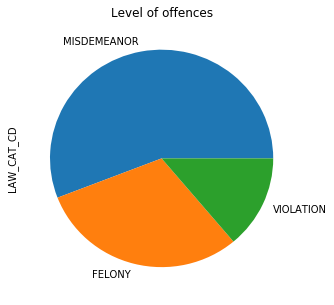

In [20]:
ax = crime_sample.LAW_CAT_CD.value_counts().plot.pie(figsize=(5,5), title='Level of offences')

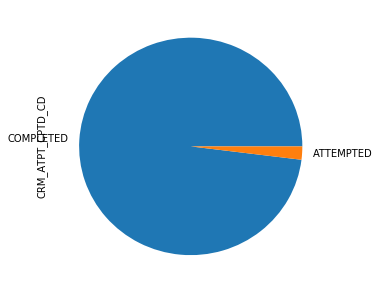

In [21]:
crime_sample.CRM_ATPT_CPTD_CD.value_counts().plot.pie(figsize=(5,5), rot=90)

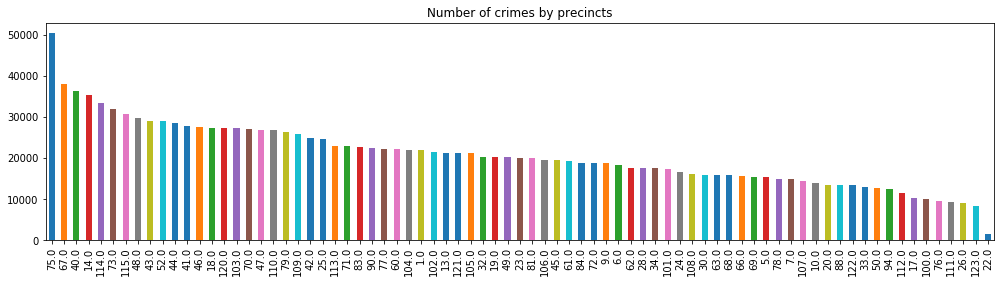

In [22]:
# TODO: geocode lat,lon w NTAs
crime_sample.ADDR_PCT_CD.value_counts().plot.bar(figsize=(17, 4), title='Number of crimes by precincts')

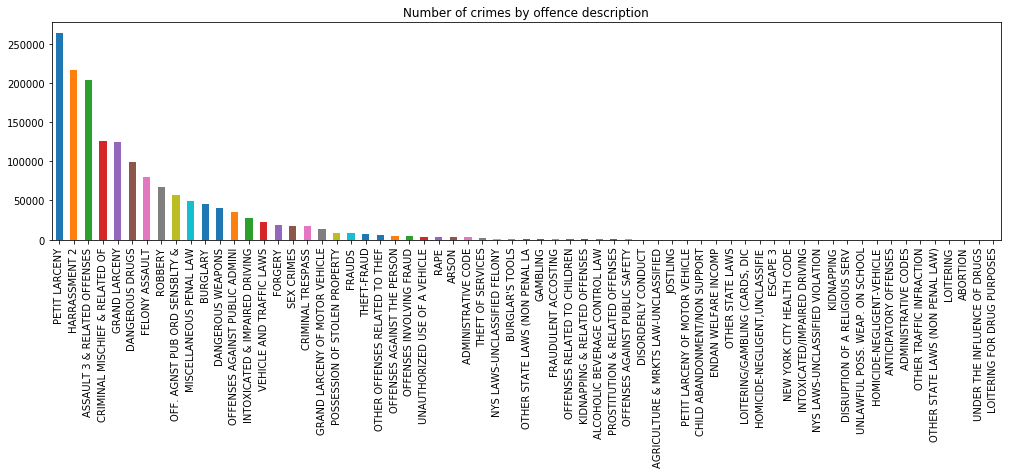

In [23]:
# types of crime
crime_sample.OFNS_DESC.value_counts().plot.bar(figsize=(17, 4), title='Number of crimes by offence description')

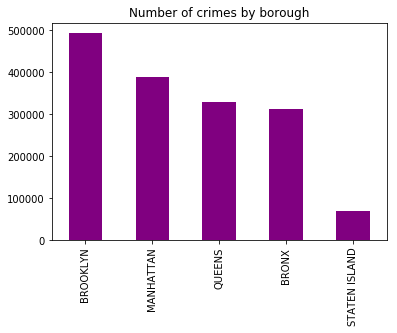

In [24]:
crime_sample.BORO_NM.value_counts().plot.bar(color='purple', title='Number of crimes by borough')